In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [82]:
df=pd.read_csv('./dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [83]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [85]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [86]:
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'spending_score'})
df.head()

,CustomerID,Gender,Age,Income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
sc=StandardScaler()
X=df[['Income','spending_score']]
X=sc.fit_transform(X)


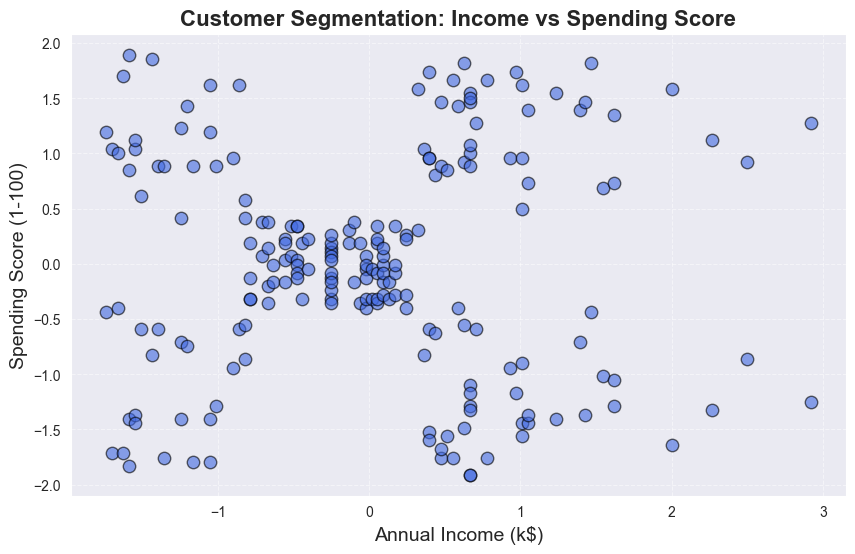

In [88]:

plt.figure(figsize=(10,6))

plt.scatter(
    X[:,0], X[:,1],
    c='royalblue',
    edgecolor='k',
    s=80,
    alpha=0.6
)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Customer Segmentation: Income vs Spending Score', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

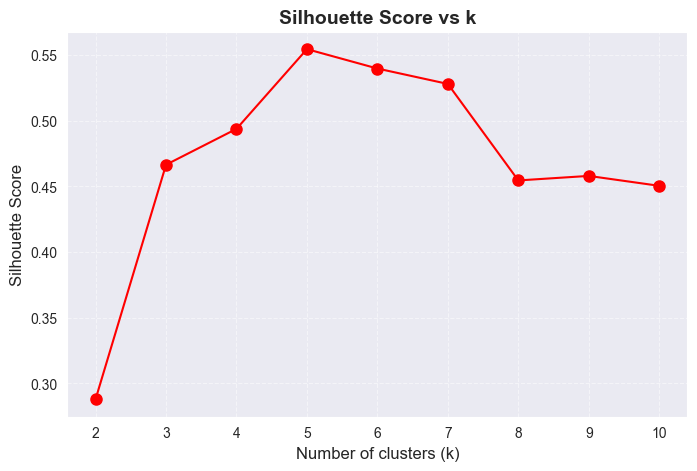

In [89]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2,11):
    model = KMeans(n_clusters=i,init='k-means++', n_init=15)
    labels=model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))


# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs k', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [90]:
model=KMeans(n_clusters=5,init='k-means++', n_init=15)
model.fit(X)
labels=model.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [91]:
df['cluster']=labels

In [92]:
df.head()

,CustomerID,Gender,Age,Income,spending_score,cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [93]:
df['cluster'].unique()

array([4, 2, 0, 1, 3], dtype=int32)

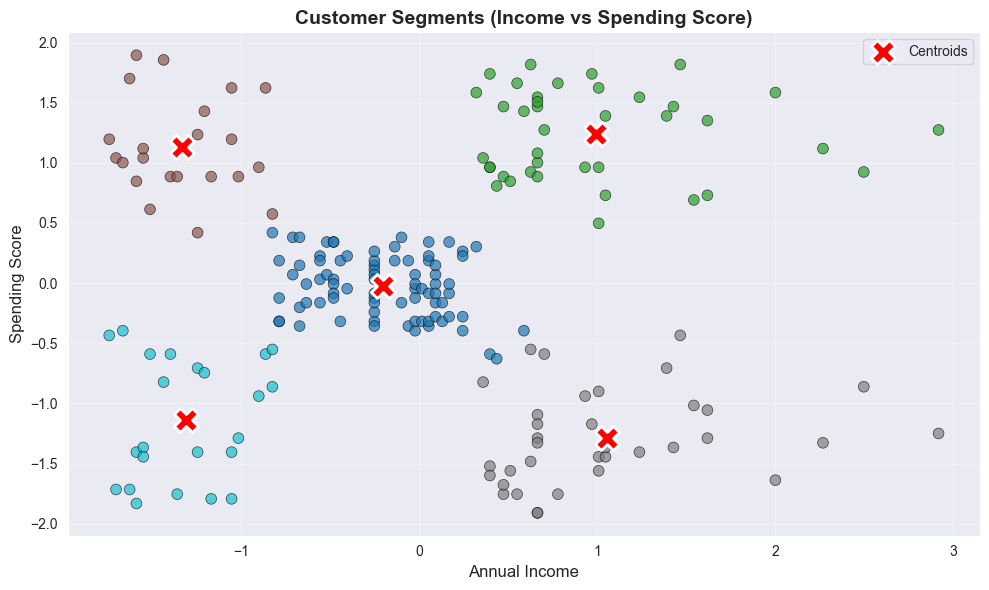

In [94]:
# Plot using X array (2D array with Income and spending_score)
plt.figure(figsize=(10, 6))


# X[:, 0] = Income, X[:, 1] = spending_score
plt.scatter(X[:, 0], X[:, 1],
           c=df['cluster'], cmap='tab10', s=60, alpha=0.7,
           edgecolor='k', linewidth=0.5)


centroids = model.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           c='red', s=300, marker='X', edgecolor='white',
           linewidth=2, label='Centroids', zorder=100)


plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.title('Customer Segments (Income vs Spending Score)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

